In [1]:
# se importan librerias
import pandas as pd                    # dataframe
from matplotlib import pyplot as plt   # para plots
from regEX import *                    # expresiones regulares
from shark import *

In [ ]:
'''
Mi objetivo es relacionar la mortalidad y el tipo de daños causados con la 
especie de tiburon para descubrir, no solo que especie es la que genera mayor tasa de mortalidad, 
sino tambien que especie provoca mayores daños no mortales.

En una segunda parte intentare construir una serie temporal con esa informacion 
para tratar de responder una pregunta:
¿los tiburones se estan volviendo mas agresivos con el tiempo?.  
'''


In [2]:
datos=pd.read_csv('attacks.csv', encoding='ISO-8859-1')           # se crea el dataframe
#display (datos)
#display (datos.columns)
display (datos.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
datos=datos[['Year', 'Type', 'Activity', 'Species ', 'Injury', 'Fatal (Y/N)']]  # se escogen los datos a tratar
# elimino el resto de columnas porque no me hacen falta para el proposito del estudio

datos=datos.rename(columns={'Year': 'Año', 'Type': 'Tipo', 'Activity': 'Actividad',\
                            'Species ': 'Especie', 'Injury': 'Daños', 'Fatal (Y/N)': 'Mortal'}) 
# renombro las columnas por comodidad

display (datos.head())

,Año,Tipo,Actividad,Especie,Daños,Mortal
0,2018.0,Boating,Paddling,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,Unprovoked,Standing,NaN,Minor injury to left thigh,N
2,2018.0,Invalid,Surfing,NaN,Injury to left lower leg from surfboard skeg,N
3,2018.0,Unprovoked,Surfing,2 m shark,Minor injury to lower leg,N
4,2018.0,Provoked,Free diving,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [4]:
datos=datos.dropna(how='all')                        # elimina Nan, desde el registro 6302 no hay datos
#print (datos.shape)
datos=datos[datos.Año>=1940]                         # una primera seleccion de datos, desde 1940
#print (datos.shape)
print (datos['Año'])

0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
5       2018.0
6       2018.0
7       2018.0
8       2018.0
9       2018.0
10      2018.0
11      2018.0
12      2018.0
13      2018.0
14      2018.0
15      2018.0
16      2018.0
17      2018.0
18      2018.0
19      2018.0
20      2018.0
21      2018.0
22      2018.0
23      2018.0
24      2018.0
25      2018.0
26      2018.0
27      2018.0
28      2018.0
29      2018.0
         ...  
4752    1941.0
4753    1941.0
4754    1941.0
4755    1941.0
4756    1941.0
4757    1941.0
4758    1940.0
4759    1940.0
4760    1940.0
4761    1940.0
4762    1940.0
4763    1940.0
4764    1940.0
4765    1940.0
4766    1940.0
4767    1940.0
4768    1940.0
4769    1940.0
4770    1940.0
4771    1940.0
4772    1940.0
4773    1940.0
4774    1940.0
4775    1940.0
4776    1940.0
4777    1940.0
4778    1940.0
4779    1940.0
4780    1940.0
4781    1940.0
Name: Año, Length: 4780, dtype: float64


In [5]:
datos=datos.fillna('UNKNOWN')                                   # renombro los valores nulos...
datos=datos[datos['Especie'].map(lambda x: str(x)!='UNKNOWN')]  # ... y los elimino segun ese nombre.
datos=datos.drop_duplicates()                                   # se eliminan duplicados
datos.index=range(len(datos))                                   # reindexo el frame por si lo necesito en el futuro 
print (datos.shape)                                             # 2980 registros
null=datos.isna().sum()                                         # se miran los valores nulos
print (null[null>0])                                            # el frame esta limpio

(2980, 6)
Series([], dtype: int64)


In [6]:
# clasifico el tipo de ataque: clase '0'=sin daños, '1'=daño bajo, '2'=daño medio, '3'=daño alto, '4'=mortal
datos.loc[datos['Mortal']=='Y', 'Daños']='4'                     # cambio los mortales a clase '4'
strings=[datos['Daños'][i].lower() for i in range(len(datos))]   # pasa a minusculas
datos['Clase_Daños']=regEX(strings)                              # clasificacion categorica de los ataques
display (datos)

,Año,Tipo,Actividad,Especie,Daños,Mortal,Clase_Daños
0,2018.0,Boating,Paddling,White shark,"No injury to occupant, outrigger canoe and pad...",N,0
1,2018.0,Unprovoked,Surfing,2 m shark,Minor injury to lower leg,N,1
2,2018.0,Provoked,Free diving,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N,2
3,2018.0,Unprovoked,Swimming,Tiger shark,4,Y,4
4,2018.0,Unprovoked,Fishing,"Lemon shark, 3'",Minor injury to foot. PROVOKED INCIDENT,N,1
5,2018.0,Unprovoked,Walking,"Bull shark, 6'",Lower left leg bitten,N,3
6,2018.0,Provoked,Feeding sharks,Grey reef shark,Minor bite to hand by captive shark. PROVOKED ...,N,1
7,2018.0,Invalid,Fishing,Invalid incident,Injured by teeth of a dead porbeagle shark he ...,N,3
8,2018.0,Provoked,Feeding sharks,"Tawny nurse shark, 2m",Shallow lacerations to finger PROVOKED INCIDENT,N,2
9,2018.0,Questionable,Surfing,Shark involvement not confirmed,"No injury, surfboard damaged",N,0


In [7]:
# Ahora las especies
str_shark=[datos['Especie'][i].lower() for i in range(len(datos))]   # pasa a minusculas
datos['Especie(clean)']=shark(str_shark)                             # limpieza especies
display (datos)

,Año,Tipo,Actividad,Especie,Daños,Mortal,Clase_Daños,Especie(clean)
0,2018.0,Boating,Paddling,White shark,"No injury to occupant, outrigger canoe and pad...",N,0,white
1,2018.0,Unprovoked,Surfing,2 m shark,Minor injury to lower leg,N,1,other
2,2018.0,Provoked,Free diving,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N,2,tiger
3,2018.0,Unprovoked,Swimming,Tiger shark,4,Y,4,tiger
4,2018.0,Unprovoked,Fishing,"Lemon shark, 3'",Minor injury to foot. PROVOKED INCIDENT,N,1,lemon
5,2018.0,Unprovoked,Walking,"Bull shark, 6'",Lower left leg bitten,N,3,bull
6,2018.0,Provoked,Feeding sharks,Grey reef shark,Minor bite to hand by captive shark. PROVOKED ...,N,1,grey
7,2018.0,Invalid,Fishing,Invalid incident,Injured by teeth of a dead porbeagle shark he ...,N,3,other
8,2018.0,Provoked,Feeding sharks,"Tawny nurse shark, 2m",Shallow lacerations to finger PROVOKED INCIDENT,N,2,nurse
9,2018.0,Questionable,Surfing,Shark involvement not confirmed,"No injury, surfboard damaged",N,0,other


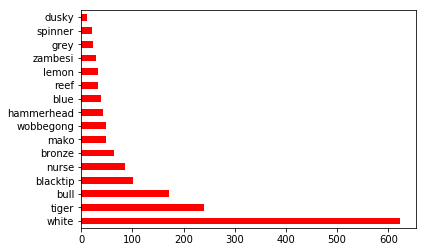

In [8]:
# plot por especie, numero de ataques
tiburones=datos['Especie(clean)'].value_counts()
tiburones[(tiburones<800) & (tiburones>10)].plot.barh(color='red')
plt.show()